# JaviGBe monday stats

## monday board tasks to csv

In [10]:
import sys
!{sys.executable} -m pip install pandas

     ---------------------------------------- 10.8/10.8 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 502.5/502.5 KB 2.9 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 KB 2.7 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\dark_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [7]:
from private.monday_credentials import monday_key
import pandas as pd
import requests
url = "https://api.monday.com/v2"
board_id = "3478645467"
body = { 'query': "query { boards(ids: " + board_id + ") {" + \
  " items { id name column_values{ id text value } }" + \
  "} }" }
headers = { 'Authorization' : monday_key }
monday_json_resp = requests.post(
  url, headers=headers, data=body
).json()
monday_pd_df_no_cols = pd.DataFrame(monday_json_resp["data"]["boards"][0]["items"])
monday_pd_df_no_cols

,id,name,column_values
0,4896354780,"Idealista toCsv, Idealista and Fotocasa append...","[{'id': 'date', 'text': '2023-12-10 16:00', 'v..."
1,4724517487,Climb,"[{'id': 'date', 'text': '2023-12-11 18:00', 'v..."
2,5283489850,Check LinkedIn/emails,"[{'id': 'date', 'text': '2023-12-10 08:00', 'v..."
3,5573367000,Automate job applier,"[{'id': 'date', 'text': '2023-12-10 09:00', 'v..."
4,5573366616,Automate e-mail reader (LinkedIn messages kept...,"[{'id': 'date', 'text': '2023-12-10 10:00', 'v..."
...,...,...,...
98,5414490140,Recl OCU,"[{'id': 'date', 'text': '', 'value': None}, {'..."
99,5535579570,Listas instagram food,"[{'id': 'date', 'text': '', 'value': None}, {'..."
100,5561429543,Automation to read js/py project entrypoint an...,"[{'id': 'date', 'text': '', 'value': None}, {'..."
101,5412684476,Planear vacaciones 2402 NOR?,"[{'id': 'date', 'text': '', 'value': None}, {'..."


In [4]:
monday_pd_df_no_cols["column_values"][0]

[{'id': 'date',
  'text': '2023-10-23 06:10',
  'value': '{"date":"2023-10-23","time":"04:10:00","changed_at":"2023-10-22T06:32:58Z"}'},
 {'id': 'numbers', 'text': '.1', 'value': '".1"'},
 {'id': 'estado',
  'text': 'Pending',
  'value': '{"index":2,"post_id":null,"changed_at":"2023-06-26T11:09:54.687Z"}'},
 {'id': 'label',
  'text': '001-Daily',
  'value': '{"index":105,"post_id":null,"changed_at":"2022-11-04T18:51:36.752Z"}'},
 {'id': 'status_1',
  'text': '4.🚩🇩🇰',
  'value': '{"index":2,"post_id":null,"changed_at":"2023-08-13T17:06:51.936Z"}'},
 {'id': 'label9', 'text': 'all', 'value': None},
 {'id': 'people',
  'text': 'JGB',
  'value': '{"changed_at":"2022-11-04T19:39:29.685Z","personsAndTeams":[{"id":36219003,"kind":"person"}]}'},
 {'id': 'subitems', 'text': '', 'value': None},
 {'id': 'text', 'text': '', 'value': None}]

In [12]:
monday_pd_df = monday_pd_df_no_cols.drop(columns="column_values")
k=0
for row in monday_pd_df_no_cols["column_values"]:
  for col in row:
    if col["id"]+"_text" not in monday_pd_df:
      monday_pd_df[col["id"]+"_text"] = ""
    #if col["id"]+"_value" not in monday_pd_df:
    #  monday_pd_df[col["id"]+"_value"] = {}
    monday_pd_df[col["id"]+"_text"][k] = col["text"]
    #monday_pd_df[col["id"]+"_value"][k] = col["value"]
  k+=1
monday_pd_df[:5]

,id,name,date_text,numbers_text,estado_text,label_text,status_1_text,label9_text,people_text,subitems_text,text_text
0,4896354780,"Idealista toCsv, Idealista and Fotocasa append...",2023-12-10 16:00,0.5,Nice to do,003-/week,1.🏠,pot-buy-ops,JGB,,
1,4724517487,Climb,2023-12-11 18:00,2,Pending,003-/week,3.🍏,all,JGB,,
2,5283489850,Check LinkedIn/emails,2023-12-10 08:00,.1,Nice to do,007-Weekly,2.💰,all,JGB,,
3,5573367000,Automate job applier,2023-12-10 09:00,.5,Nice to do,999-Once,2.💰,all,JGB,,
4,5573366616,Automate e-mail reader (LinkedIn messages kept...,2023-12-10 10:00,.5,Nice to do,999-Once,2.💰,all,JGB,,


## monday board tasks csv analysis in pandas

In [1]:
from datetime import datetime
import math
import pandas as pd
import os
javigbe_monday_stats = pd.read_csv(
  os.getcwd()[:-5] + '\\data\\tasks-priv\\' +
  'javigbe_monday_stats_' +
  # '231108' +
  datetime.utcnow().strftime('%y%m%d') +
  '.csv'
)

In [2]:
javigbe_monday_stats_dur_per_day = javigbe_monday_stats[[
  "date", "duration"
]].sort_values(by=['date']).groupby(["date"]).sum()[:14].reset_index()
next_days = pd.DataFrame({
  "date": pd.date_range(
    start=datetime.utcnow().strftime('%Y-%m-%d'),
    end=javigbe_monday_stats_dur_per_day["date"].max()
  ).map(str).map(lambda d: d[:10])
})
javigbe_monday_stats_dur_per_day = javigbe_monday_stats_dur_per_day.merge(
  next_days, how='outer', on="date"
).sort_values(by="date").reset_index().fillna(0).drop(['index'], axis=1)
javigbe_monday_stats_dur_per_day

,date,duration
0,2023-12-09,2.8
1,2023-12-10,4.2
2,2023-12-11,0.9
3,2023-12-12,2.3
4,2023-12-13,0.5
5,2023-12-14,1.0
6,2023-12-15,0.2
7,2023-12-16,1.3
8,2023-12-17,1.0
9,2023-12-18,0.5


In [5]:
javigbe_monday_stats_durs = javigbe_monday_stats_dur_per_day.drop(columns="date")
javigbe_monday_stats_durs

,duration
0,2.8
1,4.2
2,0.9
3,2.3
4,0.5
5,1.0
6,0.2
7,1.3
8,1.0
9,0.5


## More

In [ ]:
# print(javigbe_monday_stats.head())
# javigbe_monday_stats["date"] = pd.to_datetime(javigbe_monday_stats["date_value"]["date"])
# javigbe_monday_stats["duration"] = pd.to_numeric(javigbe_monday_stats["numbers_text"])
# javigbe_monday_stats["datetime"] = pd.to_datetime(javigbe_monday_stats["date_text"]) # , format='mixed')
# javigbe_monday_stats["date"] = javigbe_monday_stats["datetime"].dt.date
# javigbe_monday_stats["time"] = javigbe_monday_stats["datetime"].dt.time

def calculate_odd_d_diff(d1, d2):
  d_diff = pd.Timedelta(
      pd.to_datetime(d1) - pd.to_datetime(d2)
    ) / pd.Timedelta(days=1)
  if math.isnan(d_diff) | (not d_diff%2):
    return True
  else:
    return False

def calculate_duration_thr(d, next_fixed_dur_day):
  is_odd_d_diff = calculate_odd_d_diff(d[0], next_fixed_dur_day)
  if(is_odd_d_diff):
    return "!" if d[1]>1.5 else ""
  else:
    return "!" if d[1]>3.5 else ""

next_climbing_day = javigbe_monday_stats.loc[
  javigbe_monday_stats["task_name"] == "Climb"
  , "date"
].item()
javigbe_monday_stats["duration_thr"] = javigbe_monday_stats[[
  "date", "duration"
]].apply(
  lambda d: calculate_duration_thr(d, next_climbing_day), axis=1
)
javigbe_monday_stats.sort_values(by=['datetime'])[[
  "category", "task_name", "datetime", "duration",
  "duration_thr", "status", "frequency", "house", "notes"
]][:10]

In [12]:
import math

def get_h_diff(d):
  h_diff = pd.Timedelta(pd.to_datetime(d) - pd.to_datetime(datetime.utcnow())) / pd.Timedelta(hours=1)
  if math.isnan(h_diff):
    return 999
  else:
    return round(h_diff,1)

javigbe_monday_stats["h_diff"] = javigbe_monday_stats["date"].apply(lambda d: get_h_diff(d))
javigbe_monday_stats["h_diff"]

0      88.4
1      88.4
2      -7.6
3      88.4
4      -7.6
      ...  
86    999.0
87    999.0
88    999.0
89    999.0
90    999.0
Name: h_diff, Length: 91, dtype: float64

In [31]:
print("Next tasks:")
javigbe_monday_stats_next_2d = javigbe_monday_stats.loc[
  javigbe_monday_stats["h_diff"]<48
].sort_values(by=['datetime'])[
  ["name", "date", "time", "duration"]
]
javigbe_monday_stats_next_2d

Next tasks:


,name,date,time,duration
0,Duolingo,2023-10-31,06:10:00,0.1
57,Reply signed annex and increase base,2023-10-31,16:00:00,0.1
6,Reply Manolo Molman contacto Yolanda,2023-10-31,16:30:00,0.2
58,Alojamiento viaje Berlín Parmen/Antonio/Rey,2023-10-31,17:00:00,0.5
9,Viaje LEI-ROM-OSL-CPH 2401,2023-10-31,17:30:00,0.5
66,HS weekly quests + tavern brawl,2023-10-31,18:30:00,0.3
59,Recl OCU,2023-10-31,18:45:00,0.2
15,N→R→Wise:]→Trd&→Ing<→Pb,2023-10-31,19:30:00,0.5
16,"Ud fin stat, calc exps, Hv&Ev&TDC, down lonseddel",2023-10-31,21:00:00,0.5
63,Paralizar FWU,2023-11-01,09:00:00,0.1


In [19]:
import numpy as np
javigbe_monday_stats_dur_per_day = javigbe_monday_stats[[
  "date", "duration"
]].sort_values(by=['date']).groupby(["date"]).sum()[:14].reset_index()
javigbe_monday_stats_dur_per_day["duration_str"] = javigbe_monday_stats_dur_per_day["duration"].apply(
  lambda d: "".join(np.repeat("|", 5*d))
)
javigbe_monday_stats_dur_per_day


,date,duration,duration_str
0,2023-10-31,2.9,||||||||||||||
1,2023-11-01,4.4,||||||||||||||||||||||
2,2023-11-02,3.3,||||||||||||||||
3,2023-11-03,1.7,||||||||
4,2023-11-04,6.0,||||||||||||||||||||||||||||||
5,2023-11-05,5.5,|||||||||||||||||||||||||||
6,2023-11-06,0.1,
7,2023-11-07,1.4,|||||||
8,2023-11-08,4.0,||||||||||||||||||||
9,2023-11-09,0.8,||||


C:\Users\M104714\AppData\Local\Temp\ipykernel_17996\3410007497.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  javigbe_monday_stats_dur_per_day = javigbe_monday_stats[[ "name", "date", "numbers_text" ]].sort_values(by=['date']).groupby(["date"]).sum()[:7].reset_index()


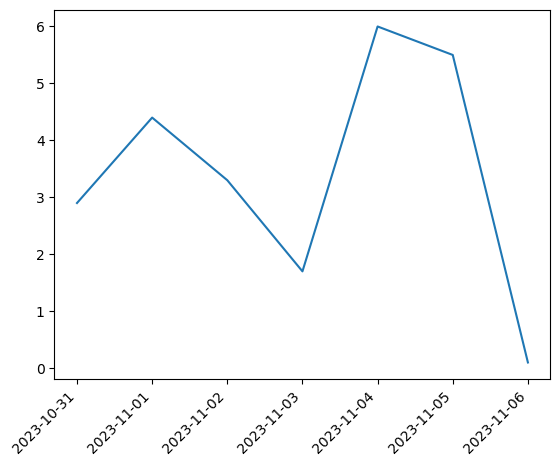

In [25]:
import matplotlib.pyplot as plt

javigbe_monday_stats_dur_per_day = javigbe_monday_stats[
  [ "name", "date", "numbers_text" ]
].sort_values(
  by=['date']
).groupby(["date"]).sum()[
  :7
].reset_index()

fig, ax = plt.subplots()
ax.plot(
  javigbe_monday_stats_dur_per_day["date"],
  javigbe_monday_stats_dur_per_day["numbers_text"]
)
plt.xticks(rotation=45, ha='right')
plt.show()